In this notebook we try to replicate [Discovering Conservation Laws using Optimal Transport and Manifold Learning](https://doi.org/10.48550/arxiv.2208.14995).

In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

### Generate trajectories

In [ ]:
import creating.pendulum as pend
import creating.harmonic_oscillator as ho
import creating.kepler_problem as kp
import creating.double_pendulum as dp
import creating.coupled_oscillator as co


pend.create_trajectories(200)
ho.create_trajectories(200)
kp.create_trajectories(200)
dp.create_trajectories(200)
co.create_trajectories(200)

## Use spectral embedding

In [6]:
import utils

### Pendulum

c:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\data_loader.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


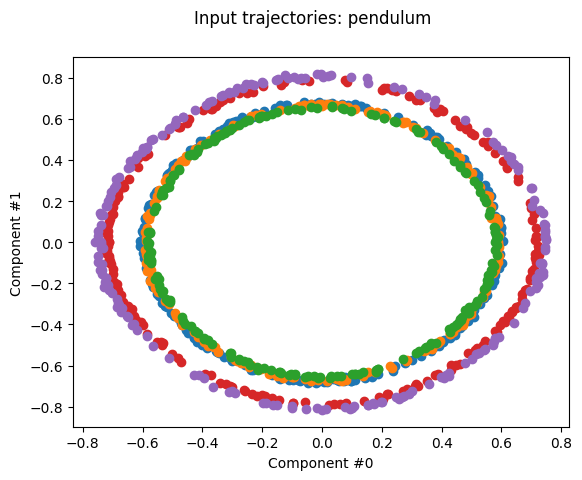

In [7]:
data_p = utils.get_data("pendulum", plot_config=[(0, 1)])

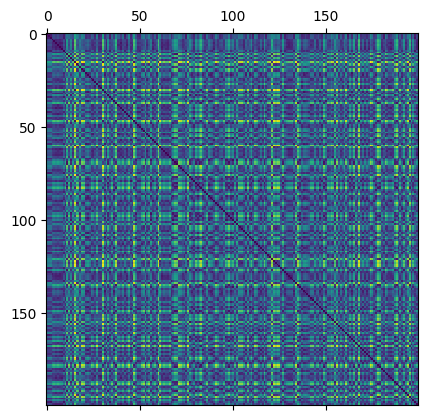

In [8]:
W_P = utils.gen_dist_matrix(data_p)
plt.matshow(W_P)

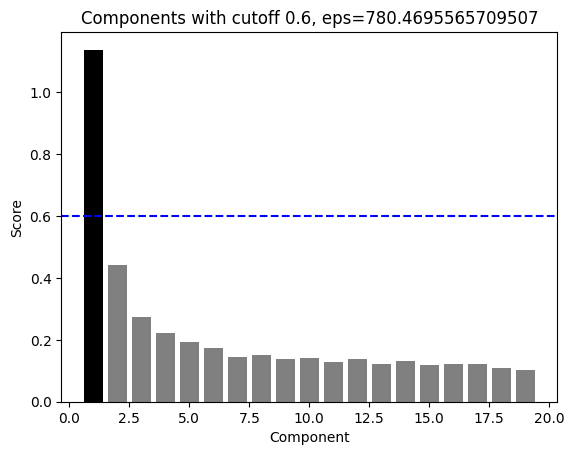

In [9]:
scores, embedding, embed_list = utils.spectral_embedding(W_P, n_neighbors=20)

## Harmonic oscillator

c:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\data_loader.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


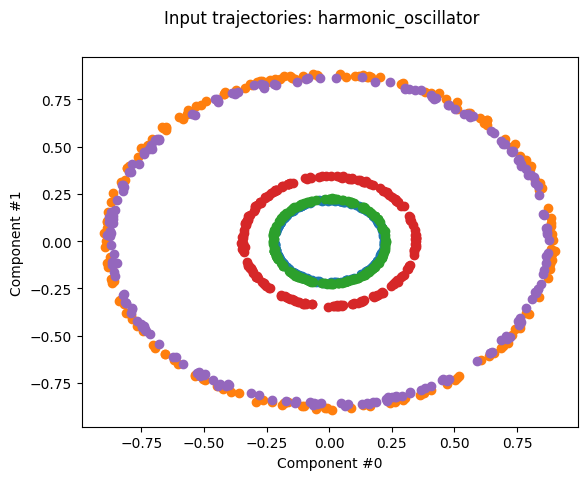

In [10]:
data_h = utils.get_data("harmonic_oscillator", plot_config=[(0, 1)])

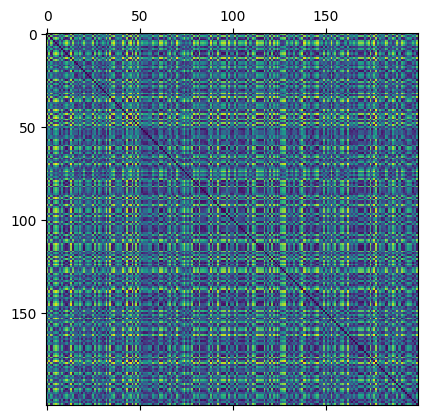

In [11]:
W_H = utils.gen_dist_matrix(data_h)
plt.matshow(W_H)

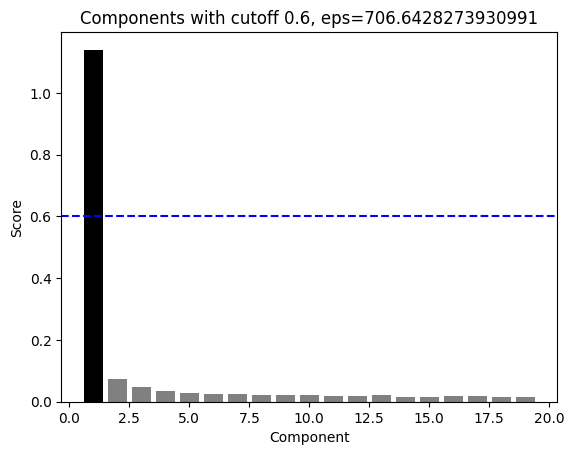

In [12]:
scores, embedding, embed_list = utils.spectral_embedding(W_H, n_neighbors=20)

## Double pendulum

c:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\data_loader.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


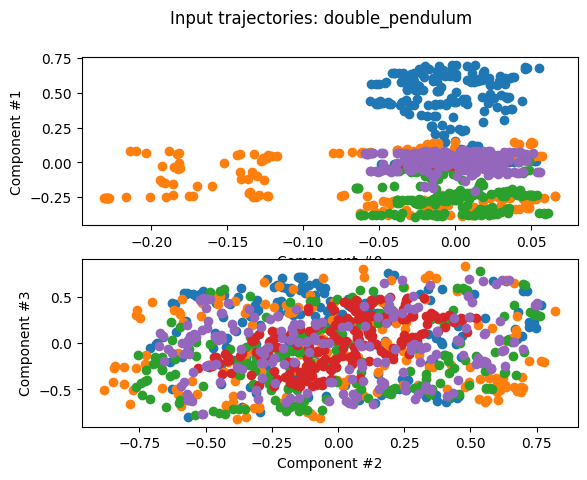

In [13]:
data_dp = utils.get_data("double_pendulum", plot_config=[(0, 1), (2, 3)])

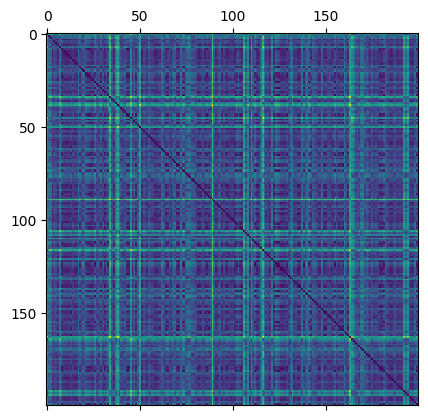

In [14]:
W_DP = utils.gen_dist_matrix(data_dp)
plt.matshow(W_DP)

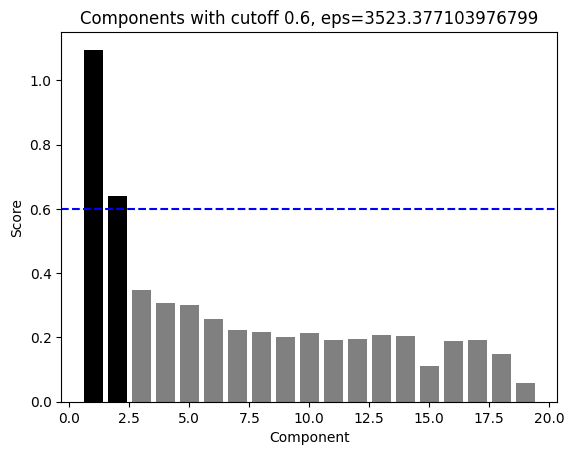

In [15]:
scores, embedding, embed_list = utils.spectral_embedding(W_DP, n_neighbors=40)

## Coupled oscillator

c:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\data_loader.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


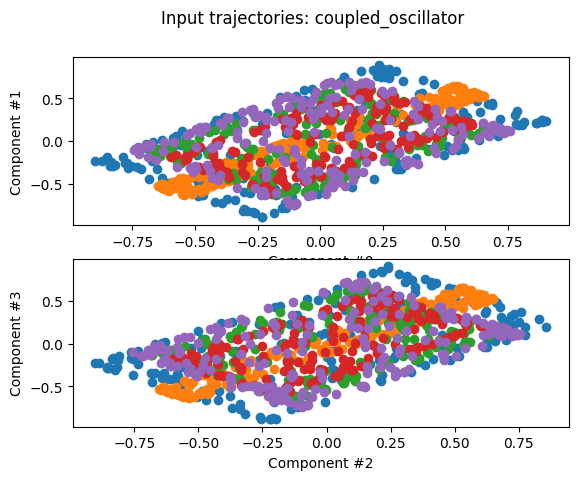

In [16]:
data_co = utils.get_data("coupled_oscillator", plot_config=[(0, 1), (2, 3)])

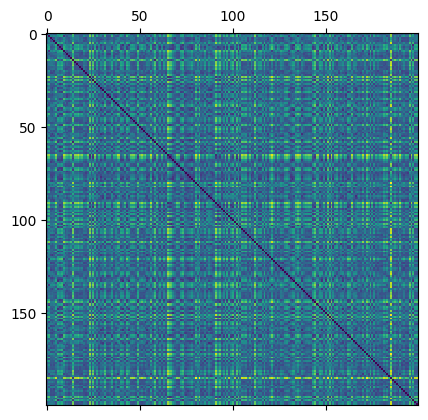

In [17]:
W_CO = utils.gen_dist_matrix(data_co)
plt.matshow(W_CO)

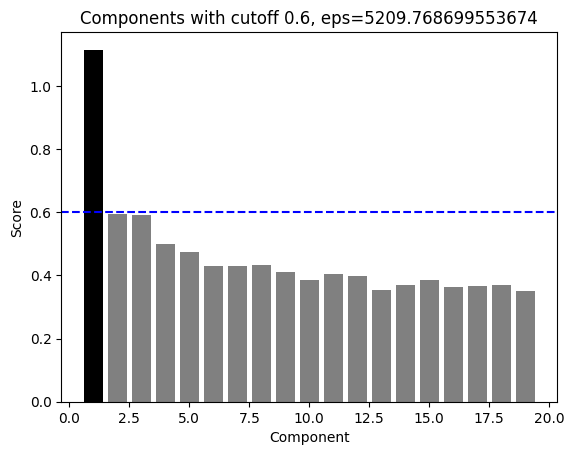

In [18]:
scores, embedding, embed_list = utils.spectral_embedding(W_CO, n_neighbors=40)

## Kepler problem

In [19]:
data_kp = utils.get_data("kepler_problem", plot_config=[(0, 1), (2, 3)])

FileNotFoundError: [Errno 2] No such file or directory: 'trajectories/kepler_problem/0.csv'

In [ ]:
W_KP = utils.gen_dist_matrix(data_kp)
plt.matshow(W_KP)

In [ ]:
scores, embedding, embed_list = utils.spectral_embedding(W_KP, n_neighbors=40)

## Three body problem

In [ ]:
# data_tbp = utils.get_data("three_body_problem", plot_config=[(0, 1), (2, 3)]) # TODO

In [ ]:
# W_TBP = utils.gen_dist_matrix(data_tbp)
# plt.matshow(W_TBP)

In [ ]:
# scores, embedding, embed_list = utils.spectral_embedding(W_TBP, n_neighbors=40)